<a href="https://colab.research.google.com/github/Herdvair/Pemodelan-Klasifikasi-Terhadap-Churn-Pelanggan/blob/main/Churn_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

## Load dataset

In [ ]:
df = pd.read_csv('/content/1702184567307-WA_FnUseC_TelcoCustomerChurn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### ubah tipe data

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype('float64')

### cek duplikat

In [ ]:
#cek duplikat
len(df.drop_duplicates()) / len(df)

1.0

Tidak ada data duplikat

### cek missing value

In [ ]:
#cek Missing value
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Ada missing value pada kolom Total Charges sebanyak 11.

In [ ]:
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df['TotalCharges'].isna().sum() * 100 / len(df)

np.float64(0.15618344455487718)

Dilakukan handling missing value menggunakan median karena distribusi total charge mengarah right-skewed.

In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [ ]:
#cek kembali untuk memastikan
df['TotalCharges'].isna().sum() * 100 / len(df)

np.float64(0.0)

done handling !

In [ ]:
for i in df.columns:
    print(f"============= {i} =================")
    display(df[i].value_counts())
    print()

============= customerID =================


,count
customerID,
3186-AJIEK,1
7590-VHVEG,1
5575-GNVDE,1
8775-CEBBJ,1
2823-LKABH,1
...,...
6713-OKOMC,1
1452-KIOVK,1
9305-CDSKC,1



============= gender =================


,count
gender,
Male,3555
Female,3488



============= SeniorCitizen =================


,count
SeniorCitizen,
0,5901
1,1142



============= Partner =================


,count
Partner,
No,3641
Yes,3402



============= Dependents =================


,count
Dependents,
No,4933
Yes,2110



============= tenure =================


,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51



============= PhoneService =================


,count
PhoneService,
Yes,6361
No,682



============= MultipleLines =================


,count
MultipleLines,
No,3390
Yes,2971
No phone service,682



============= InternetService =================


,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526



============= OnlineSecurity =================


,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526



============= OnlineBackup =================


,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526



============= DeviceProtection =================


,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526



============= TechSupport =================


,count
TechSupport,
No,3473
Yes,2044
No internet service,1526



============= StreamingTV =================


,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526



============= StreamingMovies =================


,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526



============= Contract =================


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473



============= PaperlessBilling =================


,count
PaperlessBilling,
Yes,4171
No,2872



============= PaymentMethod =================


,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522



============= MonthlyCharges =================


,count
MonthlyCharges,
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
...,...
56.85,1
101.70,1
48.40,1



============= TotalCharges =================


,count
TotalCharges,
1397.475,11
20.200,11
19.750,9
20.050,8
19.900,8
...,...
130.150,1
3211.900,1
7843.550,1



============= Churn =================


,count
Churn,
No,5174
Yes,1869


### encoding

#### encoding data tidak konsisten

Lakukan encoding pada :

- MultipleLines = No phone service
- OnlineSecurity = No internet service
- OnlineBackup = No internet service
- DeviceProtection = No internet service
- TechSupport = No internet service
- StreamingTV = No internet service
- StreamingMovies = No internet service

menjadi NO saja

In [ ]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [ ]:
encode_kategorikal = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in encode_kategorikal:
    df[col] = df[col].replace('No internet service', 'No')

encoding done!

In [ ]:
#cek kembali
for i in df.columns:
    print(f"============= {i} =================")
    display(df[i].value_counts())
    print()

============= customerID =================


,count
customerID,
3186-AJIEK,1
7590-VHVEG,1
5575-GNVDE,1
8775-CEBBJ,1
2823-LKABH,1
...,...
6713-OKOMC,1
1452-KIOVK,1
9305-CDSKC,1



============= gender =================


,count
gender,
Male,3555
Female,3488



============= SeniorCitizen =================


,count
SeniorCitizen,
0,5901
1,1142



============= Partner =================


,count
Partner,
No,3641
Yes,3402



============= Dependents =================


,count
Dependents,
No,4933
Yes,2110



============= tenure =================


,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51



============= PhoneService =================


,count
PhoneService,
Yes,6361
No,682



============= MultipleLines =================


,count
MultipleLines,
No,4072
Yes,2971



============= InternetService =================


,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526



============= OnlineSecurity =================


,count
OnlineSecurity,
No,5024
Yes,2019



============= OnlineBackup =================


,count
OnlineBackup,
No,4614
Yes,2429



============= DeviceProtection =================


,count
DeviceProtection,
No,4621
Yes,2422



============= TechSupport =================


,count
TechSupport,
No,4999
Yes,2044



============= StreamingTV =================


,count
StreamingTV,
No,4336
Yes,2707



============= StreamingMovies =================


,count
StreamingMovies,
No,4311
Yes,2732



============= Contract =================


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473



============= PaperlessBilling =================


,count
PaperlessBilling,
Yes,4171
No,2872



============= PaymentMethod =================


,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522



============= MonthlyCharges =================


,count
MonthlyCharges,
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
...,...
56.85,1
101.70,1
48.40,1



============= TotalCharges =================


,count
TotalCharges,
1397.475,11
20.200,11
19.750,9
20.050,8
19.900,8
...,...
130.150,1
3211.900,1
7843.550,1



============= Churn =================


,count
Churn,
No,5174
Yes,1869


### cek outlier

In [ ]:
col_numeric = df.select_dtypes(include=['int64', 'float64']).columns

def check_plot(df,cols):
  for i in cols:
    plt.figure(figsize=(20, 4))
    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[i], bins=30)
    plt.title('Histogram')
    # box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[i])
    plt.title('Boxplot')
    plt.show()

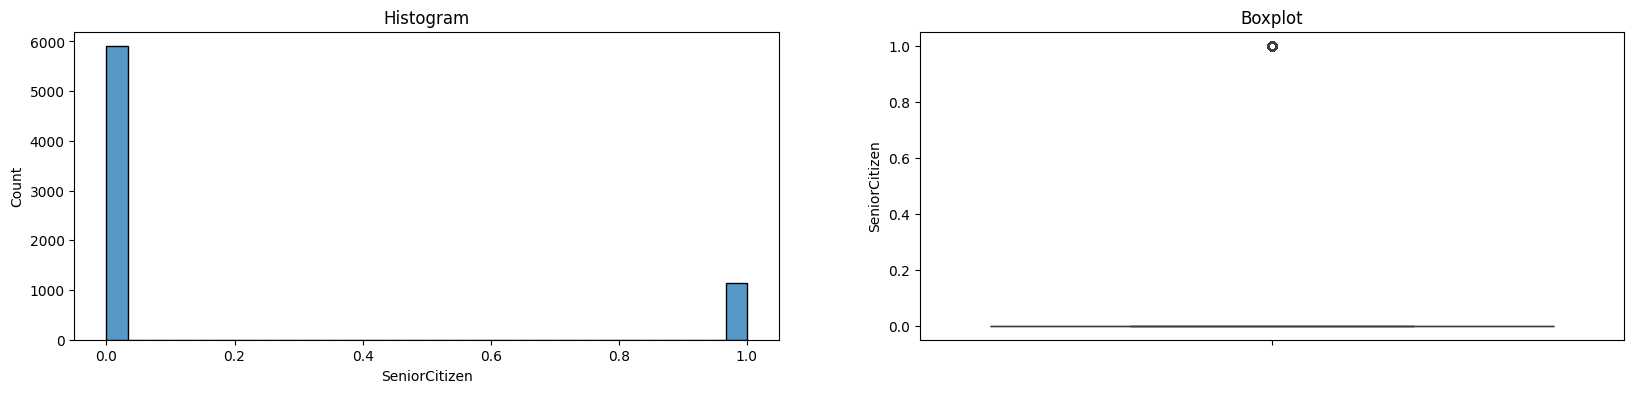

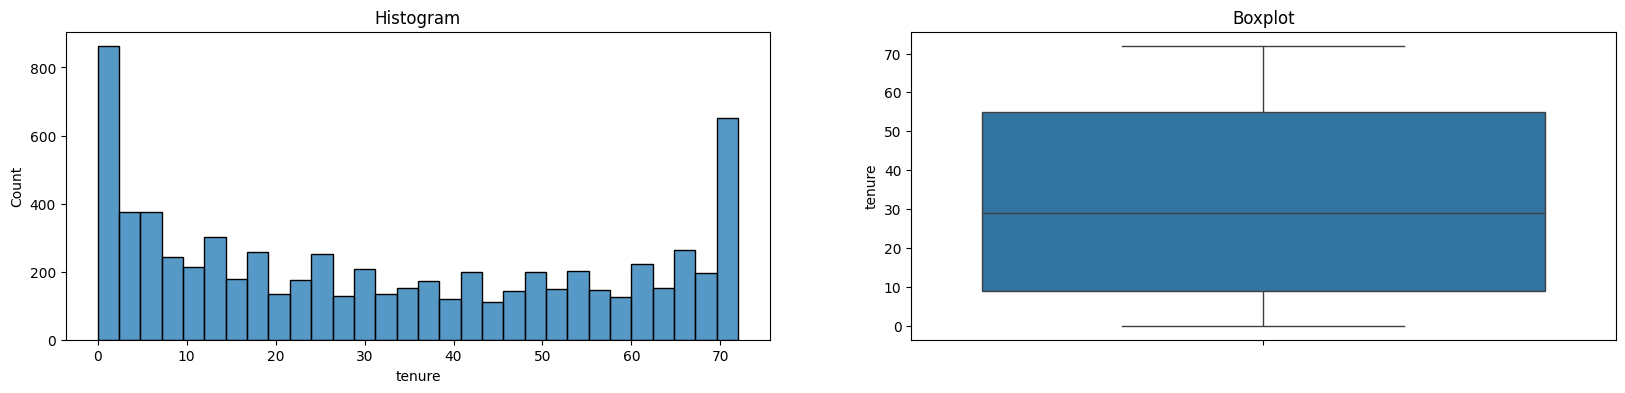

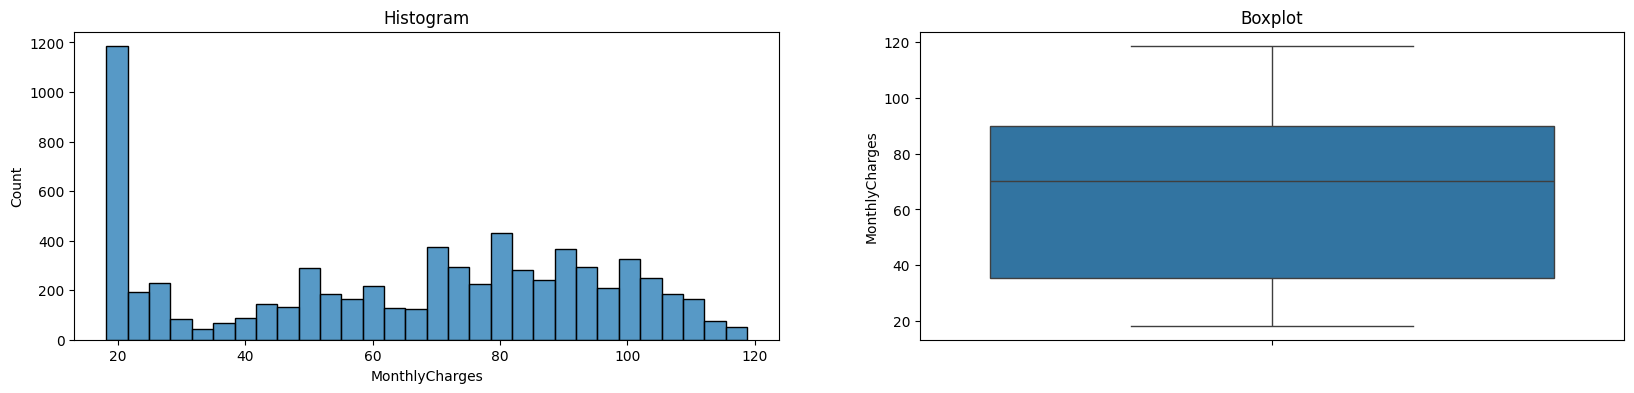

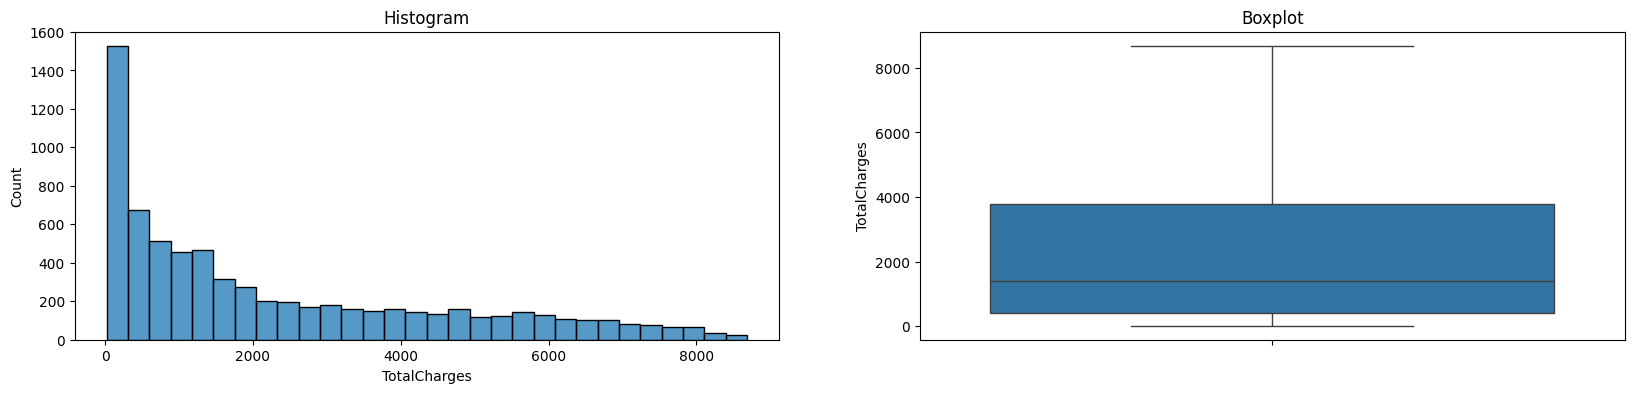

In [ ]:
check_plot(df, col_numeric)

Tidak perlu handling outlier.

## Split Dataset

In [ ]:
feature = df.drop(['Churn', 'customerID'], axis=1)
target = df['Churn']

feature_telco_train, feature_telco_test, target_telco_train, target_telco_test = train_test_split(feature, target, test_size=0.20, random_state=42)

## Train

## EDA

### distribusi kolom kategori berdasarkan churn

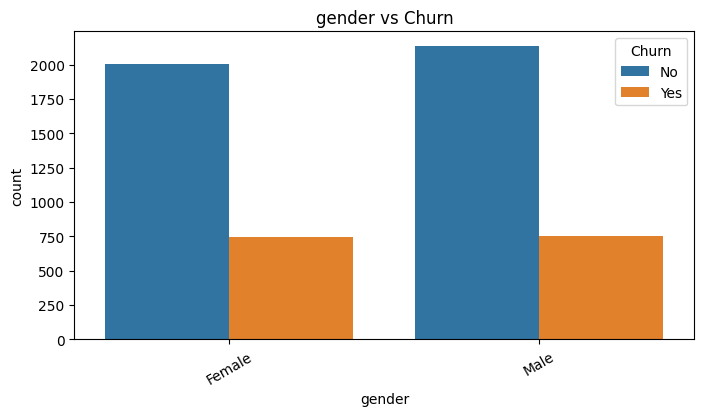

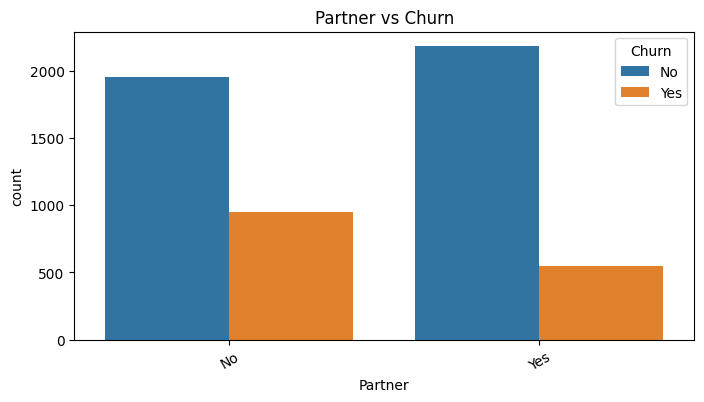

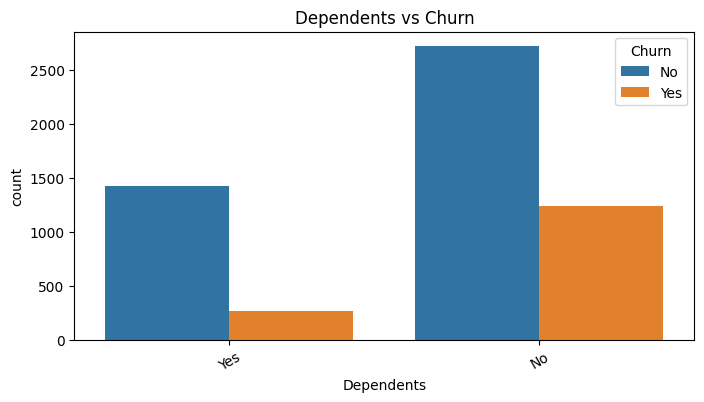

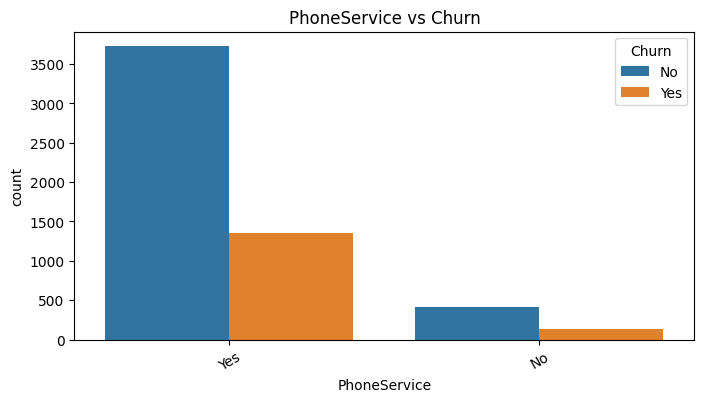

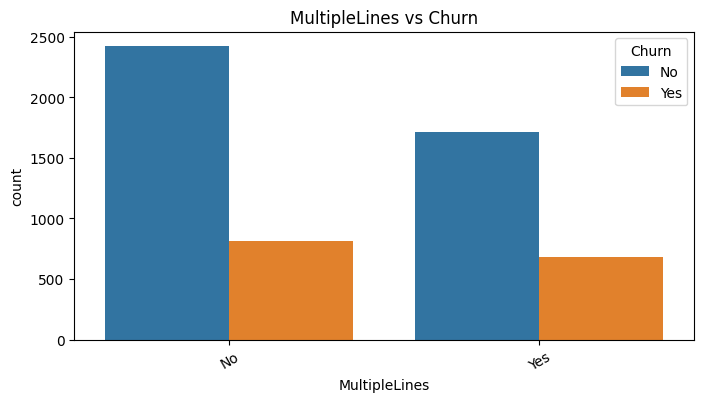

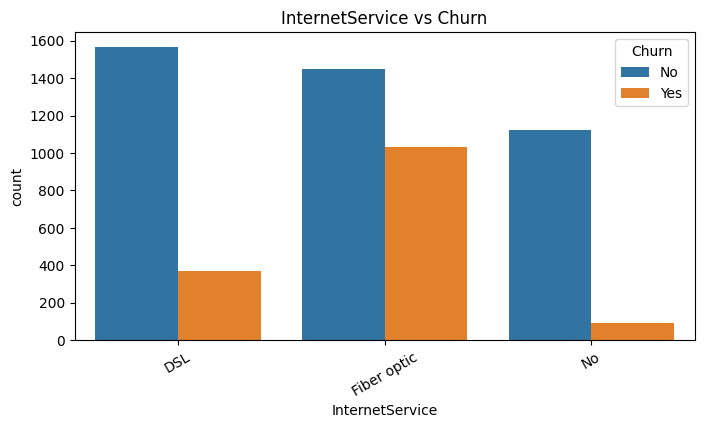

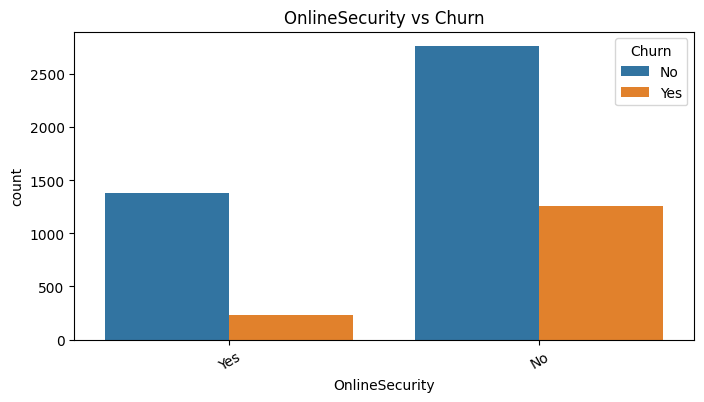

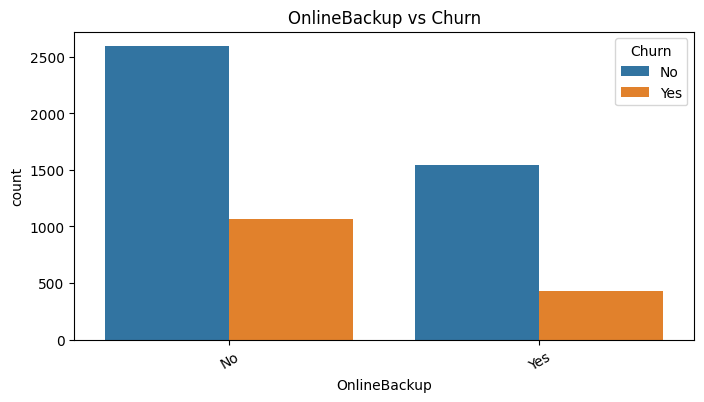

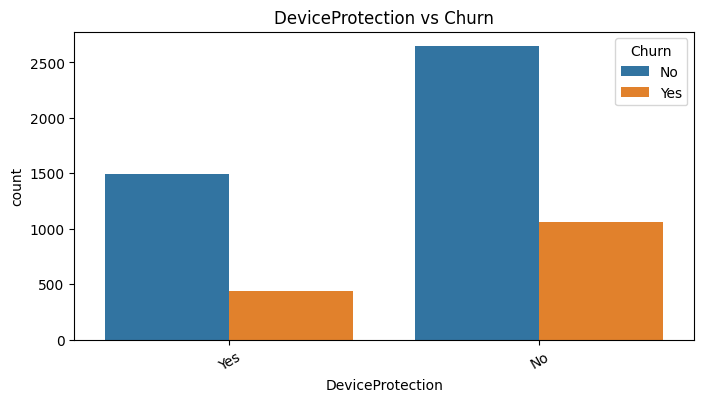

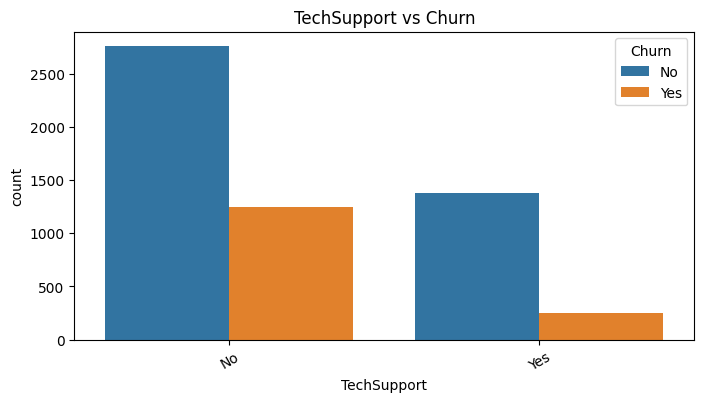

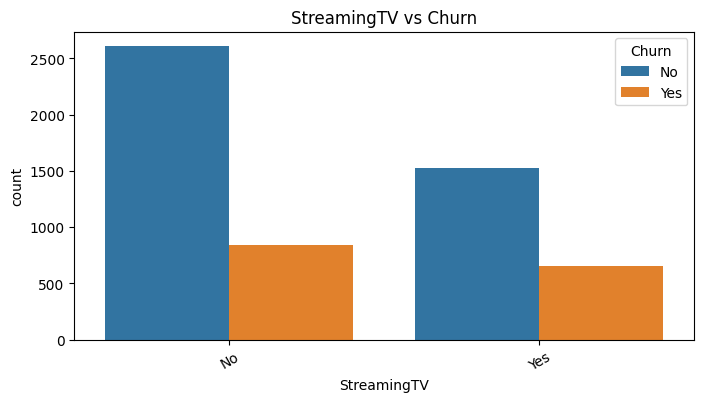

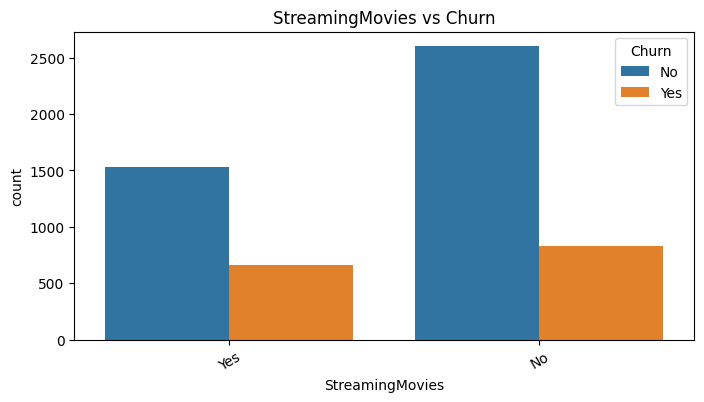

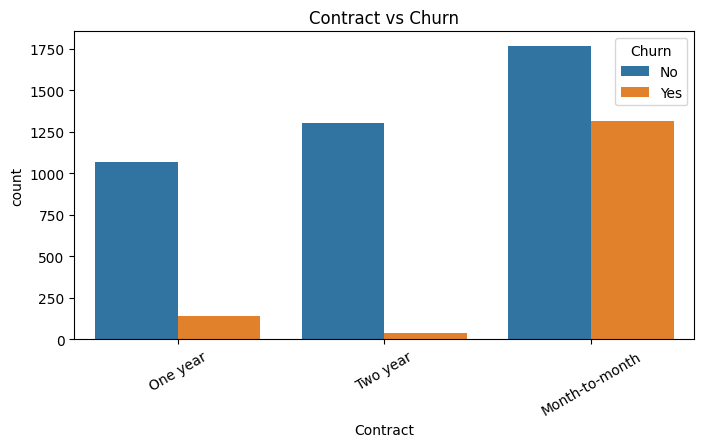

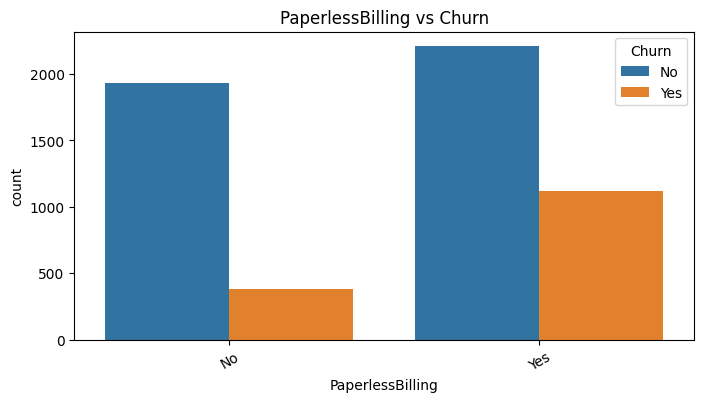

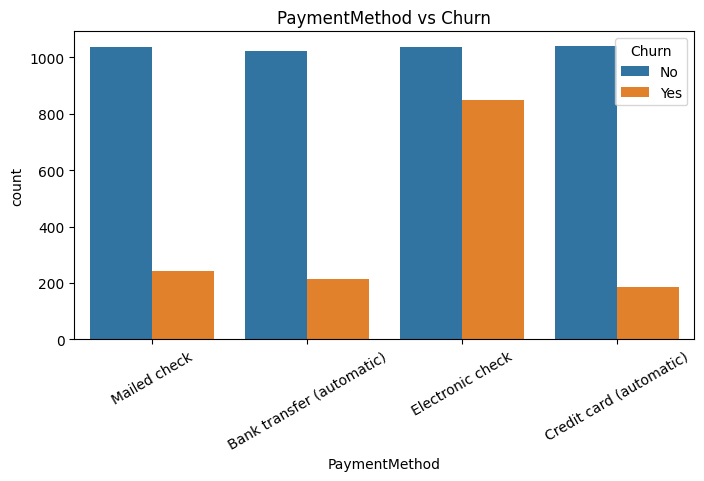

In [ ]:
kategori_col = feature_telco_train.select_dtypes(include=['object']).columns

train_kategori_plot = pd.concat([feature_telco_train, target_telco_train], axis=1)

for i in kategori_col:
  plt.figure(figsize=(8,4))
  sns.countplot(data=train_kategori_plot, x=i, hue='Churn')
  plt.title(f"{i} vs Churn")
  plt.xticks(rotation=30)
  plt.show()

Rangkuman Interpretasi :

Secara keseluruhan, baik pada informasi pelanggan, jenis layanan yang digunakan, hingga berdasarkan informasi metode pembayaran yang digunakan. Proporsi pelanggan yang tidak churn lebih banyak dibandingkan pelanggan yang churn. Artinya, pelanggan masih banyak yang berlangganan pada perusahaan layanan telekomunikasi ini.

### distribusi kolom numerik berdasarkan churn

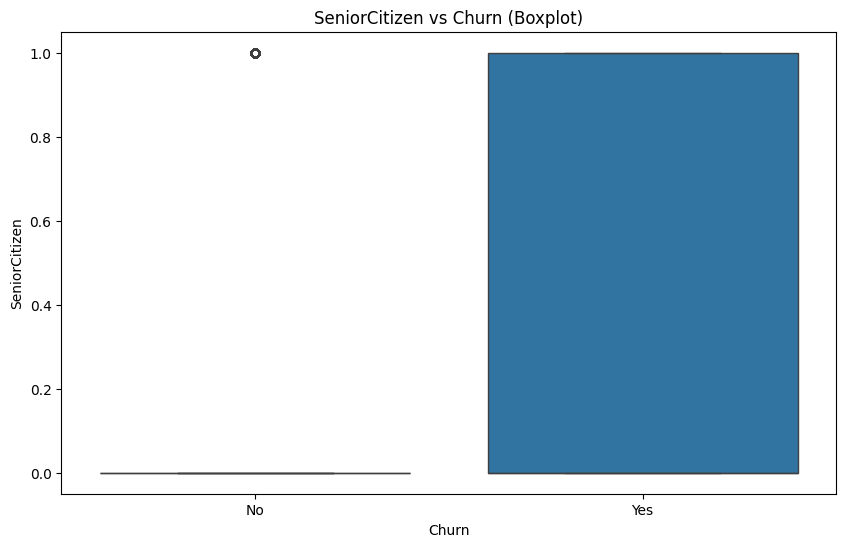

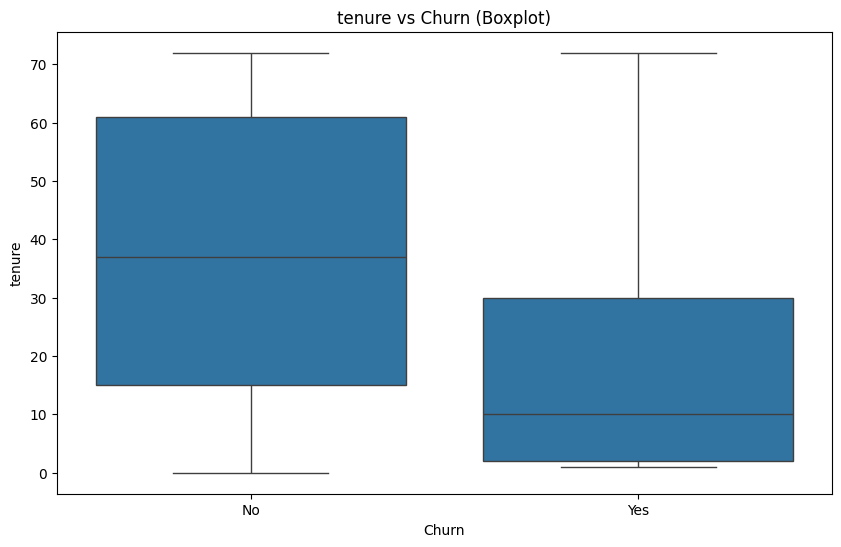

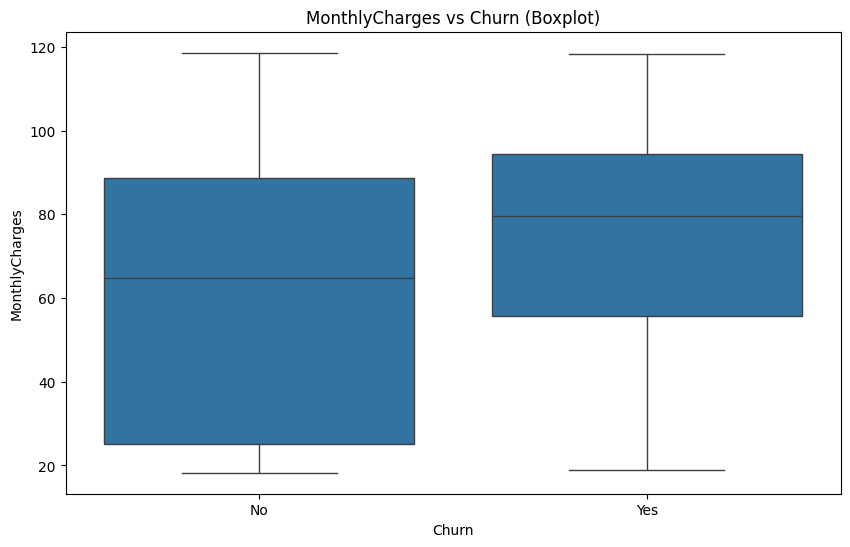

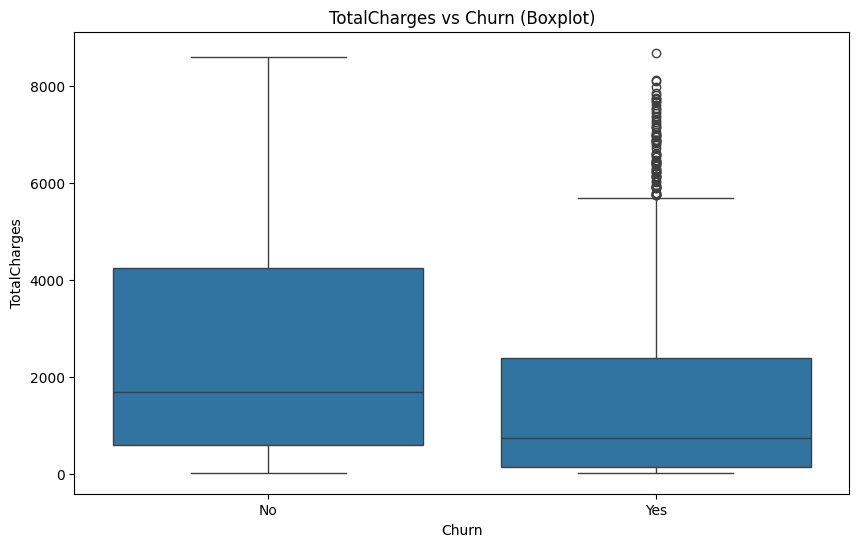

In [ ]:
numeric_col = feature_telco_train.select_dtypes(include=['int64', 'float64']).columns

train_numeric_plot = pd.concat([feature_telco_train, target_telco_train], axis=1)


for i in numeric_col:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=train_numeric_plot, x='Churn', y=i)
    plt.title(f"{i} vs Churn (Boxplot)")

Rangkumanan Interpretasi :

Berdasarkan biaya langganan yang dibebankan pada pelanggan, menunjukkan bahwa monthly charges yang tinggi berpotensi meningkatkan churn, namun proporsi pelanggan tidak churn lebih besar dibandingkan churn berdasarkan total charges langganan yang dibebankan. Disisi lain, senior citizen terlihat tidak menunjukkan pola dominan pada churn. Dengan demikian, potensi pelanggan tidak churn masih tinggi dan menunjukkan bahwa sebagian besar pelanggan masih loyal pada layanan telekomunikasi ini.

### korelasi antara variabel numerik

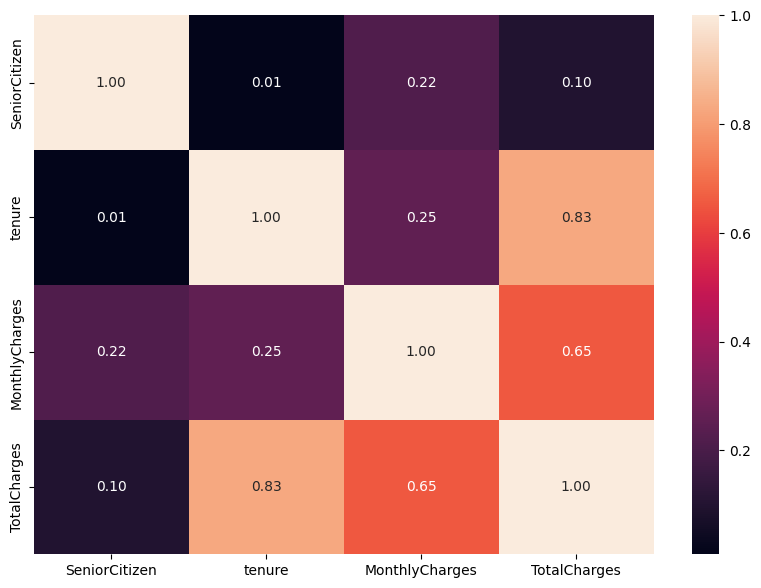

In [ ]:
numeric_train_data = train_numeric_plot.select_dtypes(include=['int64', 'float64'])

corr = numeric_train_data.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Ringkasan Interpretasi :

Dari korelasi heatmap, terlihat bahwa tenure dan Monthly Charges punya pengaruh kuat terhadap Total Charges. Status Senior Citizen tidak banyak berhubungan dengan variabel biaya maupun lama berlangganan. Hal ini menunjukkan bahwa dalam prediksi churn, fokus sebaiknya lebih diarahkan pada variabel terkait biaya dan lama berlangganan dibanding status usia pelanggan.

### korelasi antara fitur (kategori) dan target -> Menggunakan Chi-Square

In [ ]:
from scipy.stats import chisquare, chi2_contingency
for i in kategori_col:
    contingency_table = pd.crosstab(train_kategori_plot[i], train_kategori_plot['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # mencari kekuatan sampel
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt((chi2 / n) / min_dim)
    #menampilkan hasil
    print(f"============= {i} =================")
    print(f"Stats Chi-Square {i}: {chi2}")

    if p < 0.05:
        print(f"P-value for {i}: {p:.4f} -> Ada hubungan signifikan")
    else:
        print(f"P-value for {i}: {p:.4f} -> Tidak ada hubungan secara signifikan")

    if cramers_v < 0.1:
        print(f"value cramers : {cramers_v:.4f} -> Effect sangat lemah terhadap churn \n")
    elif cramers_v < 0.3:
        print(f"value cramers : {cramers_v:.4f} -> Effect lemah terhadap churn \n")
    elif cramers_v  < 0.5:
        print(f"value cramers : {cramers_v:.4f} -> Effect medium terhadap churn \n")
    else:
        print(f"value cramers : {cramers_v:.4f} -> Effect kuat terhadap churn \n")


============= gender =================
Stats Chi-Square gender: 0.7228850594322362
P-value for gender: 0.3952 -> Tidak ada hubungan secara signifikan
value cramers : 0.0113 -> Effect sangat lemah terhadap churn 

============= Partner =================
Stats Chi-Square Partner: 113.3862996474443
P-value for Partner: 0.0000 -> Ada hubungan signifikan
value cramers : 0.1419 -> Effect lemah terhadap churn 

============= Dependents =================
Stats Chi-Square Dependents: 147.70780779334967
P-value for Dependents: 0.0000 -> Ada hubungan signifikan
value cramers : 0.1619 -> Effect lemah terhadap churn 

============= PhoneService =================
Stats Chi-Square PhoneService: 0.3797992589411726
P-value for PhoneService: 0.5377 -> Tidak ada hubungan secara signifikan
value cramers : 0.0082 -> Effect sangat lemah terhadap churn 

============= MultipleLines =================
Stats Chi-Square MultipleLines: 7.215641471207253
P-value for MultipleLines: 0.0072 -> Ada hubungan signifikan

sumber :  [referensi code ](https://www.statology.org/cramers-v-in-python/)

Ringkasan Interpretasi :

Faktor contract dan internet service adalah prediktor penting terhadap churn. Faktor lain seperti payment method, paperless billing, tech support, dan online security berhubungan dengan churn namun efeknya lemah.Selain itu, gender dan PhoneService tidak relevan untuk menjelaskan churn.

### Data Preprocessing

### Encoding (OHE) & Label Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
category_ohe = ['InternetService', 'Contract', 'PaymentMethod']

In [ ]:
transform_ohe = encoder.fit_transform(feature_telco_train[category_ohe])

In [ ]:
ohe_df = pd.DataFrame(transform_ohe,
                   columns = encoder.get_feature_names_out(category_ohe),
                   index = feature_telco_train.index)

In [ ]:
feature_telco_train = pd.concat([feature_telco_train.drop(columns=category_ohe), ohe_df], axis=1,)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
feature_telco_train['gender'] = label_encoder.fit_transform(feature_telco_train['gender'])
feature_telco_train['Partner'] = label_encoder.fit_transform(feature_telco_train['Partner'])
feature_telco_train['Dependents'] = label_encoder.fit_transform(feature_telco_train['Dependents'])
feature_telco_train['PhoneService'] = label_encoder.fit_transform(feature_telco_train['PhoneService'])
feature_telco_train['MultipleLines'] = label_encoder.fit_transform(feature_telco_train['MultipleLines'])
feature_telco_train['OnlineSecurity'] = label_encoder.fit_transform(feature_telco_train['OnlineSecurity'])
feature_telco_train['OnlineBackup'] = label_encoder.fit_transform(feature_telco_train['OnlineBackup'])
feature_telco_train['DeviceProtection'] = label_encoder.fit_transform(feature_telco_train['DeviceProtection'])
feature_telco_train['TechSupport'] = label_encoder.fit_transform(feature_telco_train['TechSupport'])
feature_telco_train['StreamingTV'] = label_encoder.fit_transform(feature_telco_train['StreamingTV'])
feature_telco_train['StreamingMovies'] = label_encoder.fit_transform(feature_telco_train['StreamingMovies'])
feature_telco_train['PaperlessBilling'] = label_encoder.fit_transform(feature_telco_train['PaperlessBilling'])


In [ ]:
feature_telco_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,0,0,1,21,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1623,0,0,0,0,54,1,1,0,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6074,1,0,1,0,1,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1362,1,0,0,0,4,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6754,1,0,0,1,0,1,1,1,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
target_telco_train= label_encoder.fit_transform(target_telco_train)

In [ ]:
target_telco_train = pd.Series(target_telco_train)

In [ ]:
target_telco_train.value_counts()

,count
0,4138
1,1496


ada imbalance data

In [ ]:
target_telco_train.value_counts(normalize=True)

,proportion
0,0.734469
1,0.265531


Dilakukan oversampling menggunakan SMOTE

[sumber referensi](https://www.geeksforgeeks.org/machine-learning/smote-for-imbalanced-classification-with-python/)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
feature_telco_train, target_telco_train = smote.fit_resample(feature_telco_train, target_telco_train)
target_telco_train.value_counts()

,count
0,4138
1,4138


### Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

### Decision Tree dengan Hyperparameter

[sumber referensi 1](https://www.geeksforgeeks.org/machine-learning/overfitting-in-decision-tree-models/)

[sumber referensi 2](https://medium.com/biased-algorithms/grid-search-for-decision-tree-ababbfb89833)

[sumber referensi 3](https://www.analyticsvidhya.com/blog/2024/03/decision-trees-split-methods-hyperparameter-tuning/)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
)

grid.fit(feature_telco_train, target_telco_train)
print("Best params:", grid.best_params_)

Best params: {'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 50}


In [ ]:
model_grid_dt = DecisionTreeClassifier(
                                    max_depth=7,  #dicoba melalui eksperimen (selain based on best params)
                                    min_samples_leaf=20, #ini juga kondisi yang sama
                                    min_samples_split=50,
                                    class_weight='balanced',
                                    random_state=24)

model_grid_dt.fit(feature_telco_train, target_telco_train)
target_pred_train_dt = model_grid_dt.predict(feature_telco_train)


### Random Forest menggunakan Hyperparameter

[sumber referensi 1](https://www.geeksforgeeks.org/machine-learning/random-forest-hyperparameter-tuning-in-python/)

[sumber referensi 2](https://www.datacamp.com/tutorial/random-forests-classifier-python)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 400],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10],
    'bootstrap': [True],
    'max_features': ['sqrt','log2']
}

random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(feature_telco_train, target_telco_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=15)


In [ ]:
from sklearn.metrics import classification_report
model_grid = RandomForestClassifier(
                                    bootstrap=True,
                                    max_depth=20,
                                    min_samples_leaf=5, #ini juga dari eksperimen
                                    min_samples_split=15,
                                    n_estimators=400,
                                    class_weight='balanced',
                                    random_state=24)

model_grid.fit(feature_telco_train, target_telco_train)
target_pred_train = model_grid.predict(feature_telco_train)



### Evaluation

---



#### Decision Tree

In [ ]:
#decision Tree
print(classification_report(target_telco_train, target_pred_train_dt))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      4138
           1       0.83      0.84      0.83      4138

    accuracy                           0.83      8276
   macro avg       0.83      0.83      0.83      8276
weighted avg       0.83      0.83      0.83      8276



In [ ]:
#AUC-ROC dt train
from sklearn.metrics import roc_auc_score
print("Test AUC:", roc_auc_score(target_telco_train, model_grid_dt.predict_proba(feature_telco_train)[:,1]))

Test AUC: 0.918208409672953


#### Random Forest

In [ ]:
#random forest
print(classification_report(target_telco_train, target_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4138
           1       0.89      0.90      0.90      4138

    accuracy                           0.89      8276
   macro avg       0.89      0.89      0.89      8276
weighted avg       0.89      0.89      0.89      8276



In [ ]:
#AUC-ROC rf train
print("Test AUC:", roc_auc_score(target_telco_train, model_grid.predict_proba(feature_telco_train)[:,1]))

Test AUC: 0.9665036485335202


pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

**Random Forest** lebih pintar dalam mempelajari pola pada data training. Hal ini dikarenakan akurasi yang dimiliki Random Forest mencapai 89% dan performa AUC mencapai 0.96 yang semakin baik dalam membedakan dua kelas terhadap churn di data train.

## Test

### Data Preprocessing

In [ ]:
transform_ohe = encoder.fit_transform(feature_telco_test[category_ohe])

In [ ]:
ohe_df_test = pd.DataFrame(transform_ohe,
                   columns = encoder.get_feature_names_out(category_ohe),
                   index = feature_telco_test.index)


In [ ]:
feature_telco_test = pd.concat([feature_telco_test.drop(columns=category_ohe), ohe_df_test], axis=1,)

In [ ]:
feature_telco_test['gender'] = label_encoder.fit_transform(feature_telco_test['gender'])
feature_telco_test['Partner'] = label_encoder.fit_transform(feature_telco_test['Partner'])
feature_telco_test['Dependents'] = label_encoder.fit_transform(feature_telco_test['Dependents'])
feature_telco_test['PhoneService'] = label_encoder.fit_transform(feature_telco_test['PhoneService'])
feature_telco_test['MultipleLines'] = label_encoder.fit_transform(feature_telco_test['MultipleLines'])
feature_telco_test['OnlineSecurity'] = label_encoder.fit_transform(feature_telco_test['OnlineSecurity'])
feature_telco_test['OnlineBackup'] = label_encoder.fit_transform(feature_telco_test['OnlineBackup'])
feature_telco_test['DeviceProtection'] = label_encoder.fit_transform(feature_telco_test['DeviceProtection'])
feature_telco_test['TechSupport'] = label_encoder.fit_transform(feature_telco_test['TechSupport'])
feature_telco_test['StreamingTV'] = label_encoder.fit_transform(feature_telco_test['StreamingTV'])
feature_telco_test['StreamingMovies'] = label_encoder.fit_transform(feature_telco_test['StreamingMovies'])
feature_telco_test['PaperlessBilling'] = label_encoder.fit_transform(feature_telco_test['PaperlessBilling'])

In [ ]:
feature_telco_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,0,1,0,1,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2715,1,0,0,0,41,1,1,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3825,0,0,1,1,52,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1807,0,0,0,0,1,1,0,0,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
132,1,0,0,0,67,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
target_telco_test= label_encoder.fit_transform(target_telco_test)

In [ ]:
target_telco_test = pd.Series(target_telco_test)

In [ ]:
target_telco_test.head()

,0
0,1
1,0
2,0
3,1
4,0


### Decision Tree

In [ ]:
test_pred_dt= model_grid_dt.predict(feature_telco_test)

In [ ]:
# AUC-ROC for dt
y_pred_prob_dt = model_grid_dt.predict_proba(feature_telco_test)[:, 1]

### Random Forest

In [ ]:
target_pred_test_rf = model_grid.predict(feature_telco_test)

In [ ]:
# AUC-ROC for rf
y_pred_prob_rf = model_grid.predict_proba(feature_telco_test)[:, 1]

### Evaluation

#### Decision Tree

In [ ]:
#decision tree
print(classification_report(target_telco_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1036
           1       0.57      0.70      0.63       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409



In [ ]:
#decision Tree
roc_auc_dt = roc_auc_score(target_telco_test, y_pred_prob_dt)
print("Test AUC:", roc_auc_dt)

Test AUC: 0.8234121233450991


#### Random Forest

In [ ]:
#random forest
print(classification_report(target_telco_test, target_pred_test_rf))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.61      0.67      0.64       373

    accuracy                           0.80      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409



In [ ]:
roc_auc_rf = roc_auc_score(target_telco_test, y_pred_prob_rf)
print("Test AUC:", roc_auc_rf)

Test AUC: 0.855643224611053


pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

Secara keseluruhan, **Random Forest** lebih andal dibandingkan **Decision Tree** dalam membedakan churn dan tidak churn, karena memberikan performa yang lebih seimbang antara precision dan recall. Meskipun decision tree banyak dalam menangkap adanya churn yaitu recall 70%. Namun dalam hal akurasi pada **Random Forest** mencapai 80%, dan presisi sebanyak 61% menunjukkan bahwa model **Random forest dapat memprediksi yang terindikasi benar-benar churn**.

[referensi AUC](https://www.geeksforgeeks.org/machine-learning/calculate-roc-auc-for-classification-algorithm-such-as-random-forest/)

### Potential impact

Melalui penerapan model prediksi churn yang telah dikembangkan, perusahaan saat ini dapat mengidentifikasi pelanggan yang beresiko churn sebelum mereka benar-benar berhenti. Meskipun **Decision Tree** mampu menangkap lebih banyak churn (berdasarkan recall), namun akurasi dan presisi lebih rendah sehingga berpotensi menghasilkan banyak false alarm. Sebaliknya, **Random Forest** memberikan keseimbangan antara recall dan precision sehingga perusahaan bisa fokus pada pelanggan dengan resiko churn yang nyata, menghemat biaya kampanye retensi hingga menjaga tingkat loyalitas pelanggan secara optimal.